0. This notebook is the continuation to the preprocessing.ipynb notebook.

1. Import all neccessary modules 

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2. Import X and y

In [2]:
import torchvision
from torchvision import transforms
import torch
from PIL import Image

In [3]:
y = pd.read_csv('/mnt/c/Users/janos/OneDrive/Desktop/Master_thesis/Arousal.csv')

In [4]:
y = y.iloc[:,[1]]

In [5]:
os.chdir('/mnt/c/Users/janos/OneDrive/Desktop/Master_thesis')

NEW APPROACH:

Fit CNN on X-Array. Problem: How to get RGB from array?

1. Read first 10 rows from X.

In [33]:
chunk = 10
i=0
import pandas as pd
for df in pd.read_csv('X_matrix.csv',chunksize = chunk):
    X = df
    i=i+1
    if i == 1:
        break



In [176]:
X

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,0,0.032360,0.084475,0.069181,0.062781,0.024387,0.070351,0.019991,0.009447,0.012555,...,0.009969,0.014706,0.026696,0.024325,0.007543,0.009887,0.016579,0.007603,0.019443,0.030720
1,1,0.000808,0.021918,0.031580,0.052100,0.023503,0.005896,0.012323,0.005944,0.006391,...,0.016110,0.017070,0.045286,0.013977,0.026209,0.044872,0.034245,0.039393,0.018957,0.036089
2,2,0.011269,0.022948,0.016429,0.009601,0.002064,0.004806,0.014466,0.007584,0.003244,...,0.072939,0.125192,0.058180,0.104756,0.096452,0.085518,0.041805,0.006385,0.022676,0.079917
3,3,0.014511,0.007470,0.011957,0.006879,0.005326,0.007674,0.007358,0.002273,0.003501,...,0.002099,0.000596,0.002769,0.001352,0.002052,0.000772,0.001528,0.000131,0.001512,0.006722
4,4,0.054077,0.062831,0.048333,0.052550,0.025700,0.026466,0.113067,0.039630,0.067136,...,0.084342,0.035647,0.088751,0.030225,0.040237,0.095966,0.051786,0.036228,0.157274,0.098856
5,5,0.062369,0.047947,0.078463,0.100134,0.103732,0.102065,0.073728,0.143941,0.034673,...,0.012987,0.005533,0.015598,0.013861,0.055147,0.066117,0.007516,0.010584,0.001968,0.031775
6,6,0.012183,0.012427,0.007798,0.024871,0.015966,0.009635,0.010990,0.032609,0.003796,...,0.007698,0.011307,0.006566,0.005916,0.032465,0.041592,0.036547,0.056279,0.030170,0.030285
7,7,0.001619,0.015752,0.036648,0.063607,0.033807,0.027400,0.025981,0.034199,0.022095,...,0.038875,0.087789,0.094647,0.026537,0.063862,0.061218,0.025561,0.064163,0.071252,0.065783
8,8,0.133437,0.247654,0.307681,0.154734,0.042026,0.130149,0.078353,0.200438,0.103550,...,0.015960,0.010661,0.000988,0.001814,0.011068,0.003480,0.022154,0.010020,0.007874,0.010710
9,9,0.024508,0.027387,0.011827,0.017592,0.006801,0.029528,0.032117,0.068426,0.043617,...,0.002839,0.013947,0.004080,0.002469,0.001176,0.001478,0.007036,0.010399,0.017524,0.004466


In [102]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

Remove first column, because it only containts the index of the image (i.e 1(...)9)

In [200]:
len(X.iloc[0,:])

50177

(-0.5, 223.5, 223.5, -0.5)

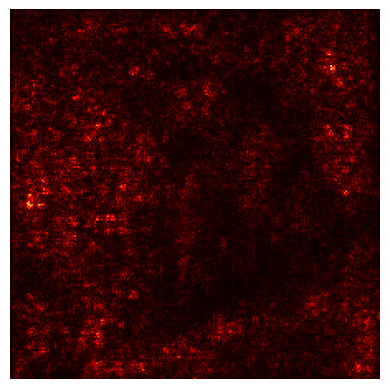

In [171]:
from PIL import Image
a = plt.imshow(np.reshape(X.iloc[7,1:].to_numpy(),(224,224)),cmap=plt.cm.hot)
plt.axis('off')


In [201]:
rgb=[]
for index in range(len(X.iloc[0,:])):
    rgb.append(a.cmap(a.norm(X.iloc[0,index])))
    

In [202]:
rgb

[(0.0416, 0.0, 0.0, 1.0),
 (0.12395875243547878, 0.0, 0.0, 1.0),
 (0.2577917251431318, 0.0, 0.0, 1.0),
 (0.2166123489253924, 0.0, 0.0, 1.0),
 (0.20631750487095757, 0.0, 0.0, 1.0),
 (0.10336906432660908, 0.0, 0.0, 1.0),
 (0.22690719297982725, 0.0, 0.0, 1.0),
 (0.09307422027217424, 0.0, 0.0, 1.0),
 (0.0621896881088697, 0.0, 0.0, 1.0),
 (0.07248453216330454, 0.0, 0.0, 1.0),
 (0.0827793762177394, 0.0, 0.0, 1.0),
 (0.0621896881088697, 0.0, 0.0, 1.0),
 (0.12395875243547878, 0.0, 0.0, 1.0),
 (0.13425359648991364, 0.0, 0.0, 1.0),
 (0.12395875243547878, 0.0, 0.0, 1.0),
 (0.175432972707653, 0.0, 0.0, 1.0),
 (0.07248453216330454, 0.0, 0.0, 1.0),
 (0.20631750487095757, 0.0, 0.0, 1.0),
 (0.15484328459878333, 0.0, 0.0, 1.0),
 (0.13425359648991364, 0.0, 0.0, 1.0),
 (0.0621896881088697, 0.0, 0.0, 1.0),
 (0.11366390838104393, 0.0, 0.0, 1.0),
 (0.22690719297982725, 0.0, 0.0, 1.0),
 (0.20631750487095757, 0.0, 0.0, 1.0),
 (0.1651381286532182, 0.0, 0.0, 1.0),
 (0.30926594541530605, 0.0, 0.0, 1.0),
 (0.1445

In [195]:
j=10
a.cmap(a.norm(X.iloc[0,j]))

(0.0827793762177394, 0.0, 0.0, 1.0)

INTEGRATE THIS INTO SALIENCY FUNCTION??

im.cmap(im.norm(data[j,i]))

In [118]:
#load pretrained resnet model
model = torchvision.models.resnet50(pretrained=True)
print(model)

#define transforms to preprocess input image into format expected by model
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
#inverse transform to get normalize image back to original form for visualization
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

#transforms to resize image to the size expected by pretrained model,
#convert PIL image to tensor, and
#normalize the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize,          
])

/home/jpauli/miniconda3/envs/yolo/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jpauli/miniconda3/envs/yolo/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [152]:
import numpy as np
import matplotlib.pyplot as plt

def saliency(img, model):
    #we don't need gradients w.r.t. weights for a trained model
    for param in model.parameters():
        param.requires_grad = False
    
    #set model in eval mode
    model.eval()
    #transoform input PIL image to torch.Tensor and normalize
    input = transform(img)
    input.unsqueeze_(0)

    #we want to calculate gradient of higest score w.r.t. input
    #so set requires_grad to True for input 
    input.requires_grad = True
    #forward pass to calculate predictions
    preds = model(input)
    score, indices = torch.max(preds, 1)
    #backward pass to get gradients of score predicted class w.r.t. input image
    score.backward()
    #get max along channel axis
    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)
    #normalize to [0..1]
    slc = (slc - slc.min())/(slc.max()-slc.min())
    slc_np = slc.numpy()
    #apply inverse transform on image
    with torch.no_grad():
        input_img = inv_normalize(input[0])
    #plot image and its saleincy map
    #plt.figure(figsize=(10, 10))
    #plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(input_img.detach().numpy(), (1, 2, 0)))
    #plt.xticks([])
    #plt.yticks([])
    #plt.subplot(1, 2, 2)
    plt.imshow(slc.numpy(), cmap=plt.cm.hot)
    cmap=plt.cm.hot
    #plt.xticks([])
    #plt.yticks([])
    #plt.show()
    return slc_np
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.03229576, 0.04508765, 0.05591203, ..., 0.00590642, 0.0070721 ,
        0.03232444],
       [0.01756893, 0.03846672, 0.04280169, ..., 0.0106892 , 0.05831495,
        0.04265864],
       [0.01851821, 0.06826618, 0.06813493, ..., 0.02988633, 0.02060037,
        0.01502852],
       ...,
       [0.00575039, 0.00406424, 0.01641852, ..., 0.01006433, 0.0087602 ,
        0.00848393],
       [0.01451896, 0.00460186, 0.02255825, ..., 0.0140165 , 0.00469091,
        0.01845095],
       [0.01290706, 0.01220589, 0.02099624, ..., 0.00643107, 0.01737655,
        0.01202157]], dtype=float32)

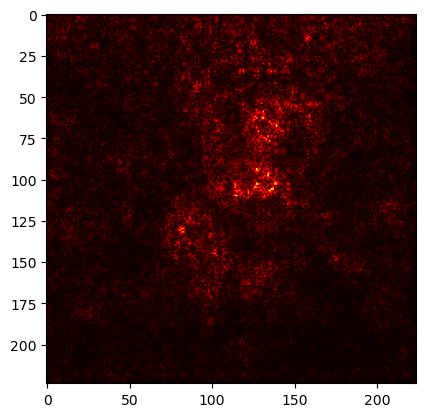

In [153]:
img = Image.open("/mnt/c/Users/janos/OneDrive/Desktop/Master_thesis/puppy.jpg").convert('RGB')
saliency(img,model)



In [166]:
a = (b,cmap=plt.cm.hot)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3781443689.py, line 1)

In [157]:
img = Image.fromarray(b, 'RGB')
test_img = np.array(img)

In [165]:
test_img[:,:,2]

array([[  4, 173,   4, ..., 133,  76,  61],
       [ 50, 235,   9, ..., 129, 228,  61],
       [ 63,  43,  11, ..., 231, 227,  61],
       ...,
       [189,  17,   7, ..., 242,  12,  61],
       [252,  92, 222, ...,  97,  14,  61],
       [ 21, 130, 161, ...,  92, 242,  59]], dtype=uint8)

In [159]:
b

array([[0.03229576, 0.04508765, 0.05591203, ..., 0.00590642, 0.0070721 ,
        0.03232444],
       [0.01756893, 0.03846672, 0.04280169, ..., 0.0106892 , 0.05831495,
        0.04265864],
       [0.01851821, 0.06826618, 0.06813493, ..., 0.02988633, 0.02060037,
        0.01502852],
       ...,
       [0.00575039, 0.00406424, 0.01641852, ..., 0.01006433, 0.0087602 ,
        0.00848393],
       [0.01451896, 0.00460186, 0.02255825, ..., 0.0140165 , 0.00469091,
        0.01845095],
       [0.01290706, 0.01220589, 0.02099624, ..., 0.00643107, 0.01737655,
        0.01202157]], dtype=float32)